# Oracles
Oracles are simply *boolean* functions. We give an input to the function or oracle or black box, and it returns an output, without us knowing its inner workings. 

Quantum oracles are black-box functions used in quantum computing to encode specific problems or functions, $f(x)$, into a unitary transformation. These oracles primarily serve to recognize solutions to a problem in a way that allows quantum algorithms to leverage quantum mechanics to efficiently search for the solution.

1. [Quantum Oracles](#1.-Quantum-Oracles)
2. [Phase Oracles](#2.-Phase-Oracles)

IBM Quantum Composer: https://quantum.ibm.com/composer/

## 1. Quantum Oracles
Quantum oracles play a key role in quantum algorithms, such as Shor's and Grover's algorithms.

The gate $U_f$ below is used to illustrate an oracle operation.

<img src='oracles_images/diagram.png'></img>

The quantum oracle $U_f$ acts as 

$\ket{x}\ket{y} \xrightarrow{U_f} \ket{x}\ket{y \oplus f(x)}$

For now, we will demonstrate a simple example of a quantum oracle. Consider $f(x) = x$.

### 1.1 IBM Quantum Composer
Let q[0] be the *answer* or *target* qubit $y$ and q[1] be the *input* qubit $x$. The result of $f(x)$ is dependent on the *input* qubit, $x$.

Setting $y = \ket{0}$, we can find $f(x)$ for $x = \ket{0}, \ket{1}$.

$\underline{x = \ket{0}, y = \ket{0}}$ &emsp; $\left(\ket{0}\ket{0 \oplus 0}\right)$

<img src='oracles_images/oracle.png'></img>

$\underline{x = \ket{1}, y = \ket{0}}$ &emsp; $\left(\ket{1}\ket{0 \oplus 1}\right)$

<img src='oracles_images/oracle1.png'></img>

### 1.2 Qiskit Implementation

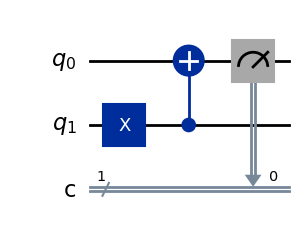

In [1]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits and 1 classical bits
qc = QuantumCircuit(2, 1)

# Step 1: Start with |0> state for the first qubit (target qubit |y>)
# The qubits are initialized to |0> by default in Qiskit

# Step 2: Initialize the second qubit (|x>) to either |0> or |1>
qc.x(1)  # Apply X gate to initialize |x> to |1> (remove this line for |x> = |0>)

# Step 3: Apply a CNOT gate with the second qubit as control and first qubit as target
qc.cx(1, 0)  # CNOT gate: |y> → |y ⊕ x|

# Step 4: Measure each qubit
qc.measure(0, 0)  # Measure the target qubit (|y ⊕ x|) into the first classical bit

# Visualize the circuit
qc.draw(output='mpl')

## 2. Phase Oracles

Previously, $\ket{y} \rightarrow \ket{y \oplus x}$. Phase oracles, however, allow one to query a quantum oracle without changing the *answer* or *target* qubit, $\ket{y}$.

To do this, we set $\ket{y} = \ket{-}$. However, this change causes the *input* qubit, $\ket{x}$, to change its phase, $\ket{x} \xrightarrow{U_f} (-1)^{f(x)}\ket{x}$.

### 2.1 IBM Quantum Composer

Let q[0] be the *answer* or *target* qubit $y$ and q[1] be the *input* qubit $x$. First, we initialize $\ket{y} = \ket{-}$, shown before the barriers below. Then we apply the oracle. This time, we measure the *input* qubit $x$ because the *answer* or *target* qubit $\ket{y}$ is unchanged.

$\underline{x = \ket{0}, y = \ket{-}}$ &emsp; $\left(\ket{0}\ket{- \oplus 0}\right)$

<img src="oracles_images/phase.png"></img>

$\underline{x = \ket{1}, y = \ket{-}}$ &emsp; $\left(\ket{1}\ket{- \oplus 1}\right)$

<img src="oracles_images/phase1.png"></img>

Notice the phase change compared to the previous quantum oracle implementation. This change is important for quantum algorithms.

### 2.2 Qiskit Implementation

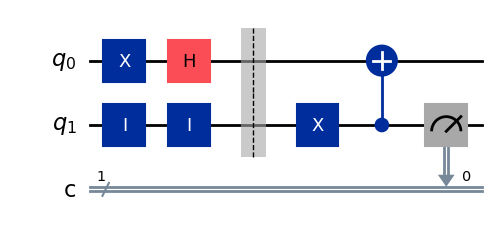

In [2]:
# Create a quantum circuit with 2 qubits and 1 classical bits
qc = QuantumCircuit(2, 1)

# Step 1: Start with |-> state for the first qubit (target qubit |y>)
# The qubits are initialized to |0> by default in Qiskit
qc.x(0)
qc.h(0)

# Add barriers (to match composer construction)
qc.barrier(0)
qc.id(1)
qc.id(1)
qc.barrier(1)

# Step 2: Initialize the second qubit (|x>) to either |0> or |1>
qc.x(1)  # Apply X gate to initialize |x> to |1> (remove this line for |x> = |0>)

# Step 3: Apply a CNOT gate with the second qubit as control and first qubit as target
qc.cx(1, 0)  # CNOT gate: |y> → |y ⊕ x|

# Step 4: Measure each qubit
qc.measure(1, 0)  # Measure the input qubit (|x>) into the first classical bit

# Visualize the circuit
qc.draw(output='mpl')